In [182]:
import pandas as pd
import requests
import io
import numpy
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [183]:
url = "https://raw.githubusercontent.com/the-data-science-union/DSU-W21-Personality/main/cleaned_youngpeople_data.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
personality_questions = pd.read_csv(io.StringIO(download.decode('utf-8')))

personality_questions=personality_questions.drop(columns=['Left - right handed', 'Gender', 'Education',
                                                          'Punctuality', 'Village - town', 'Only child', 
                                                          'Smoking', 'Internet usage', 'House - block of flats', 'Alcohol'])

In [184]:
X=personality_questions.drop(columns=['Lying'])
Y=personality_questions[['Lying']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [185]:
clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf1.score(X_test, y_test))

0.46938775510204084


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


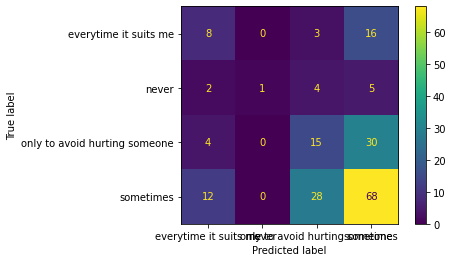

In [186]:
plot_confusion_matrix(clf1, X_test, y_test)

In [187]:
clf2 = LogisticRegression(random_state=0, penalty='l1', solver = 'saga').fit(X_train, y_train)
print(clf2.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5510204081632653


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


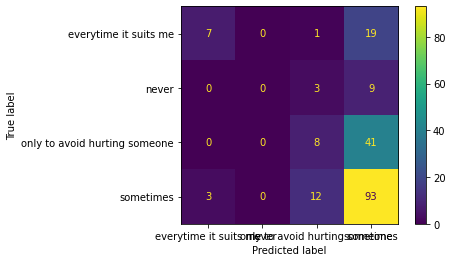

In [188]:
plot_confusion_matrix(clf2, X_test, y_test)

## **Feature Selection**

In [189]:
model = SelectFromModel(clf1, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(977, 59)


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
clf1 = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf1.score(X_test, y_test))

0.5255102040816326


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


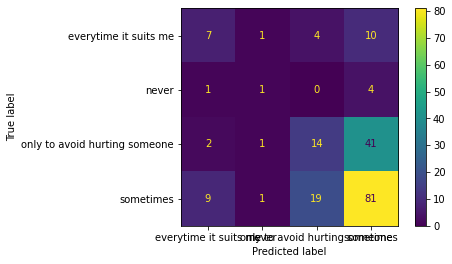

In [191]:
plot_confusion_matrix(clf1, X_test, y_test)

In [192]:
clf2 = LogisticRegression(random_state=0, penalty='l1', solver = 'saga').fit(X_train, y_train)
print(clf2.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5408163265306123


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


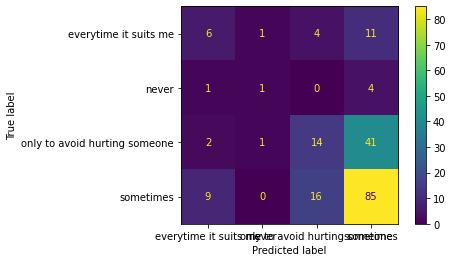

In [193]:
plot_confusion_matrix(clf2, X_test, y_test)